# Vector Rayleigh-Sommerfeld method

Here we analyze how to obtain the results at the article: H. Ye, C.-W. Qiu, K. Huang, J. Teng, B. Luk’yanchuk, y S. P. Yeo, «Creation of a longitudinally polarized subwavelength hotspot with an ultra-thin planar lens: vectorial Rayleigh–Sommerfeld method», Laser Phys. Lett., vol. 10, n.º 6, p. 065004, jun. 2013.

DOI: 10.1088/1612-2011/10/6/065004 (http://stacks.iop.org/1612-202X/10/i=6/a=065004?key=crossref.890761f053b56d7a9eeb8fc6da4d9b4e).

In this development notebook, we develope Vector Rayleigh-Sommerfeld method. The incident field is an vector field (Ex, Ey) and it is propagated and converted to (Ex,Ey,Ez)

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from matplotlib import rcParams
rcParams['figure.dpi']=250
from matplotlib import cm

In [32]:
from diffractio import np, sp, plt, nm, um, mm, degrees

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY

## Diffraction by a hole
In Figure 2, a simulation of the electric fields at z=6.5 um from a circular aperture of diameter 5$\lambda$ is obtained when $\lambda$ = 0.648 $\mu$m.

In [33]:
size=5*um
x0=np.linspace(-size,size,256)
y0=np.linspace(-size,size,256)
wavelength=.640*um
radius=5*wavelength/2

In [34]:
t=Scalar_mask_XY(x0,y0,wavelength)
t.circle(r0=(0,0), radius=radius)

In [35]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.constant_polarization(u=t,v=(1,0))

In [36]:
%%time
E1=E0.VRS(z=6.5*um, n=1, new_field=True, verbose=False, amplification=(1,1))
E1.cut_resample([-1.5,1.5], [-1.5,1.5])

CPU times: user 146 ms, sys: 1.36 ms, total: 147 ms
Wall time: 146 ms


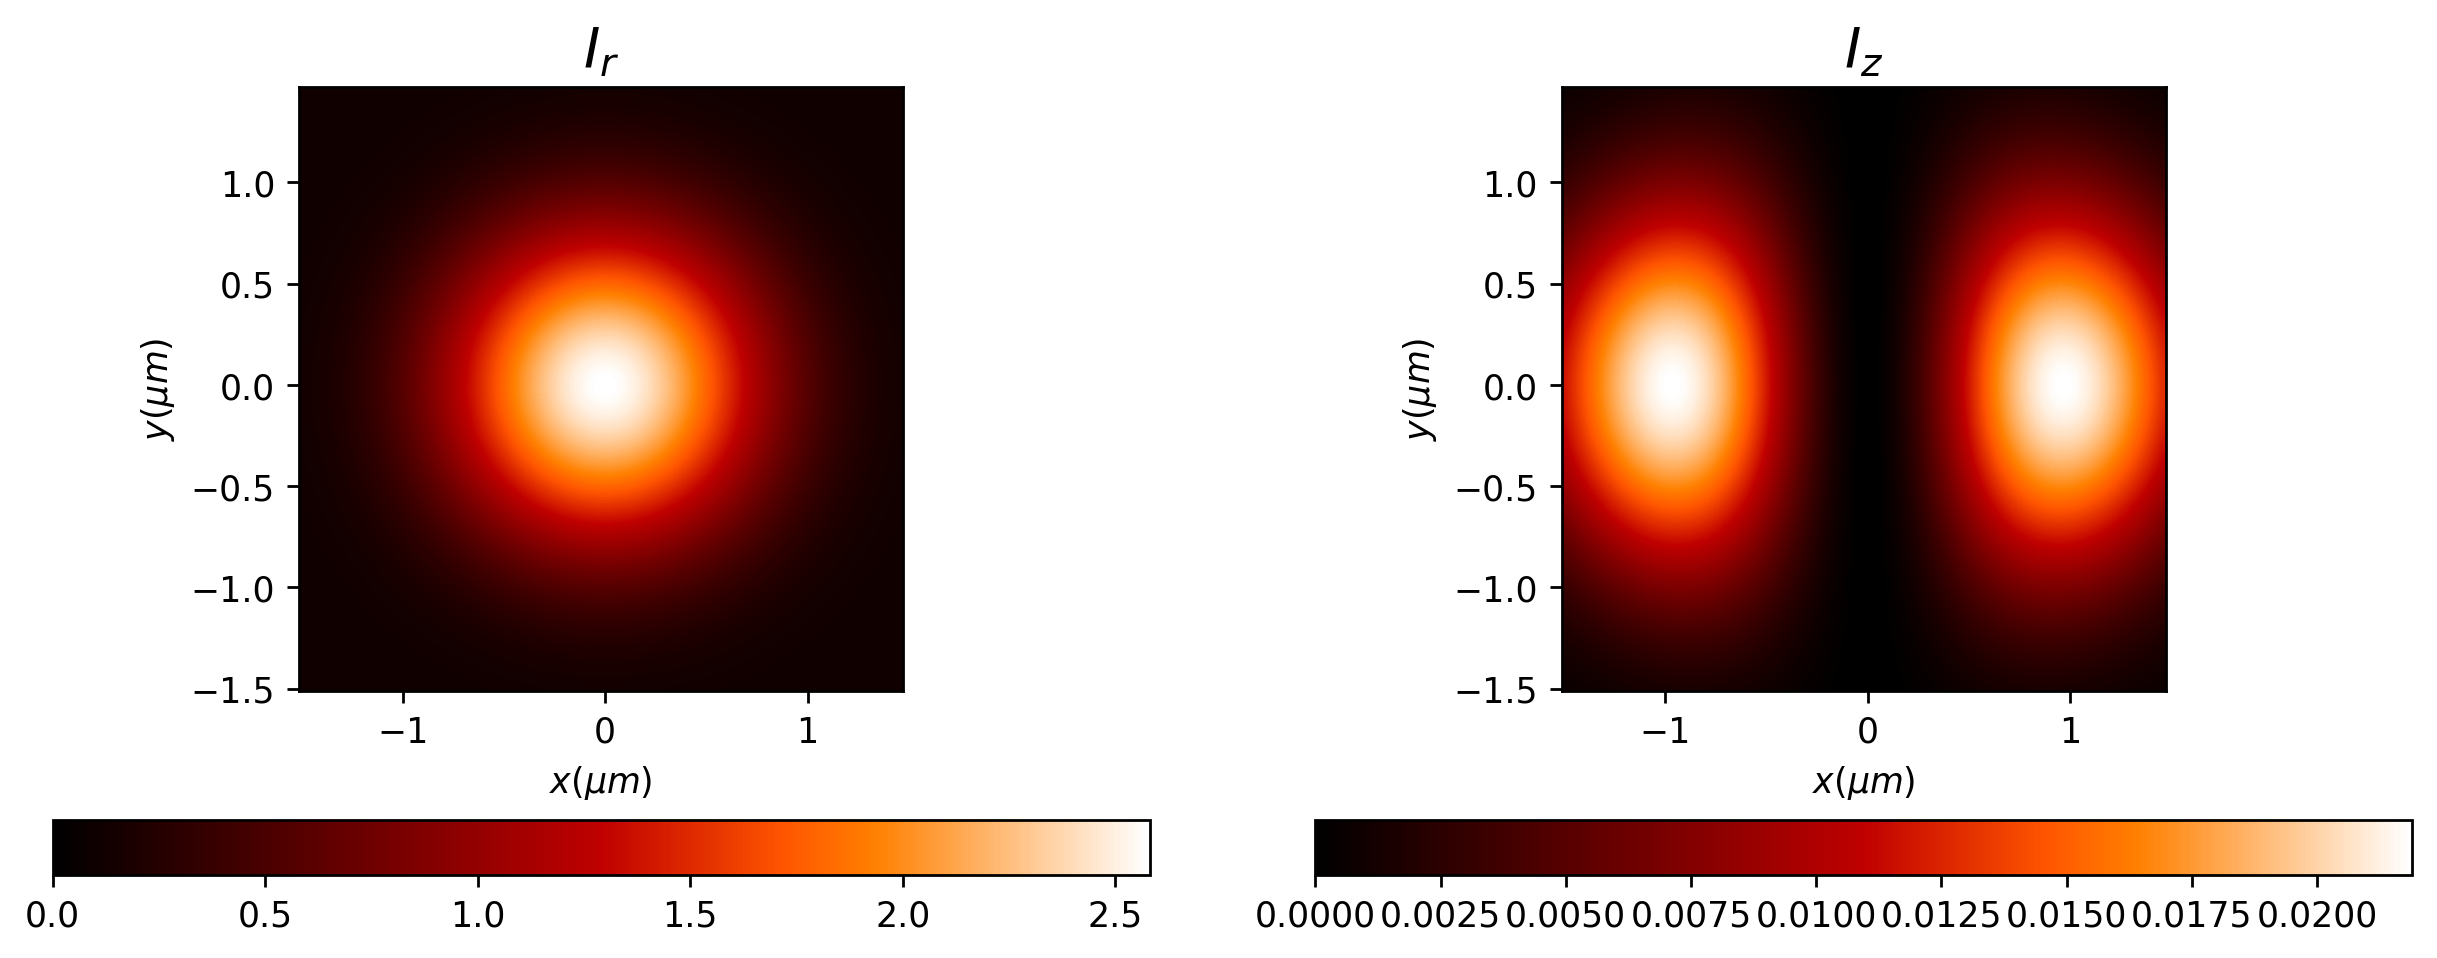

In [37]:
E1.draw(kind='intensities_rz', logarithm=False);

## Radial polarized Gaussian beam through a circular aperture
In Figure 3, the propagation of a radially polarized Gaussian beam is performed. The diameter of teh circular aperture is D = 10$\lambda$, and the beam is FWHM = 6 $\mu$m.

In [38]:
size=6.4*um
x0=np.linspace(-size,size,512)
y0=np.linspace(-size,size,512)


In [39]:
wavelength=.640*um

radius=10*wavelength/2
z_obs=10*um
beam_width=6*um/(2*np.sqrt(2))

In [40]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(A=1,r0=(0,0), z0=0, w0=beam_width)

t0=Scalar_mask_XY(x0,y0,wavelength)
t0.circle(r0=(0,0), radius=radius)

t=u0*t0

In [41]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.radial_wave(u=t,r0=(0,0))

In [42]:
E1=E0.VRS(z=z_obs, n=1, new_field=True)
E1.cut_resample([-3,3], [-3,3])

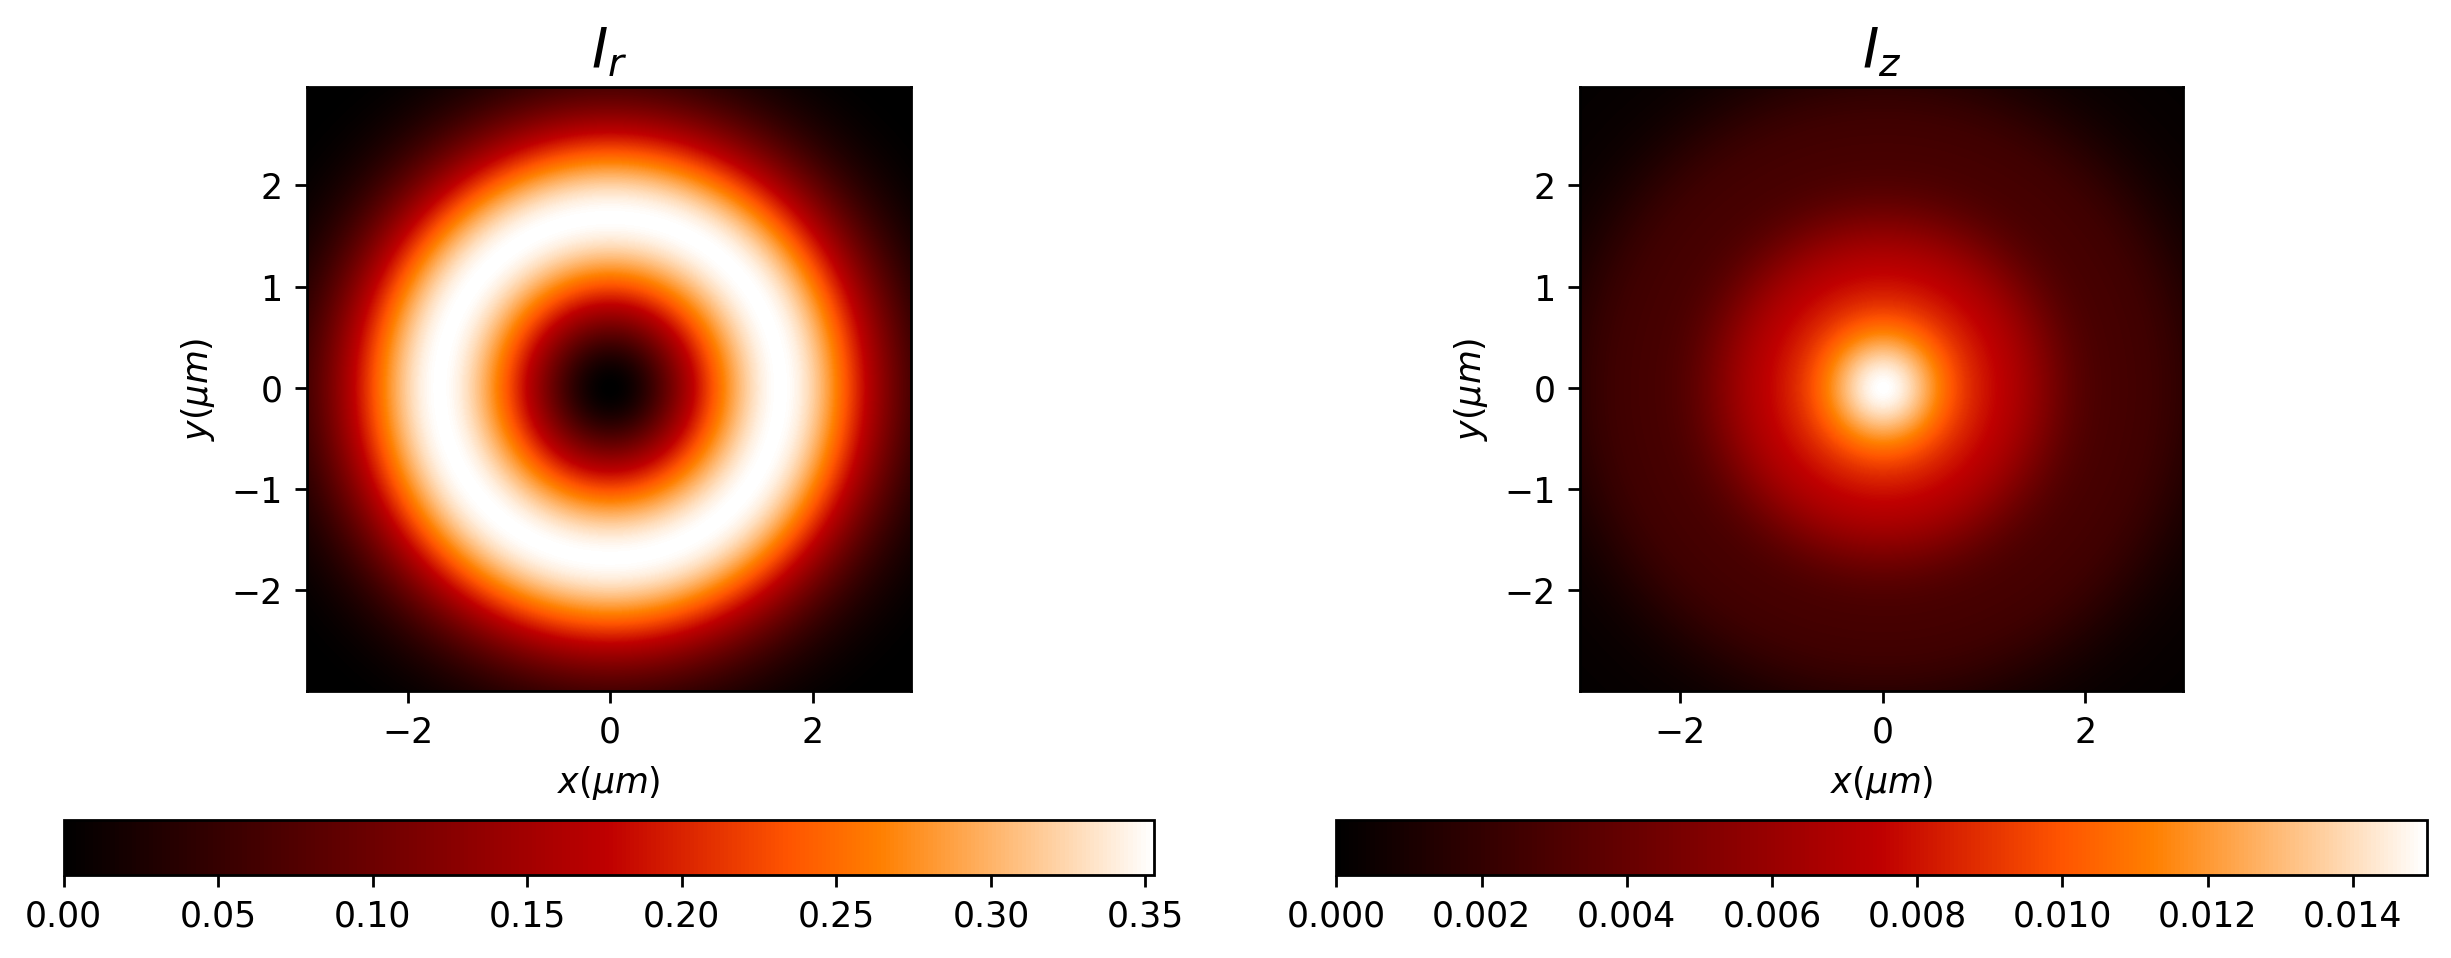

In [43]:
E1.draw('intensities_rz');

In [44]:
Ex,Ey,_=E1.get('fields', is_matrix=False)
intensity=E1.get('intensity')
Ex.u=np.sqrt(intensity)

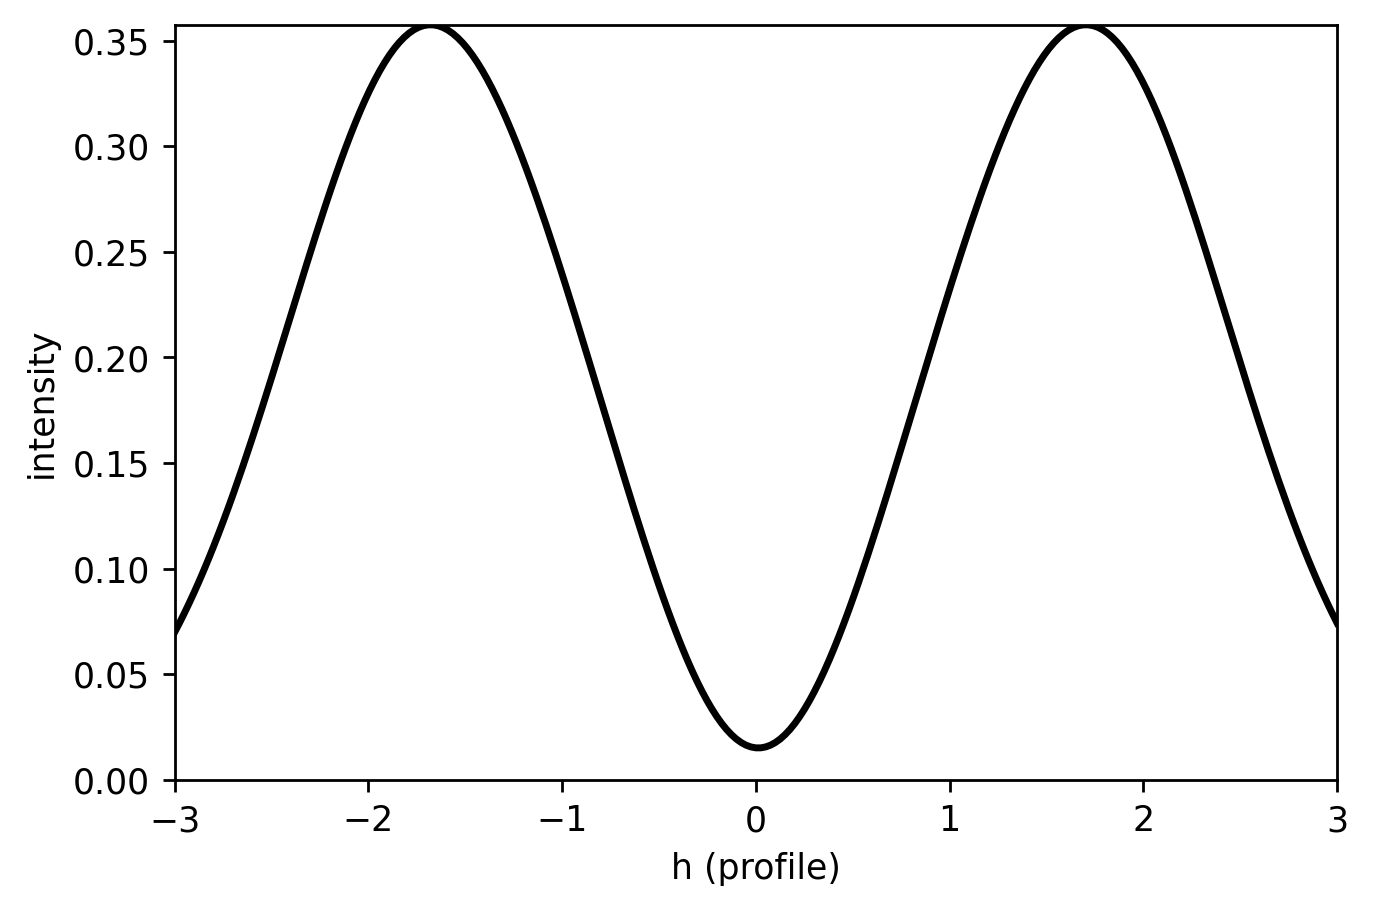

In [45]:
Ex.draw_profile([-3,0],[3,0], order=2); # a trick as draw_profile is not implemented in vector yet.
plt.ylim(ymin=0);

## Focusing with a lens a beam with a high $E_z$ component
In Figures 4 and 5 a planar lens formed by rings is developed in order to obtain a high $E_z$ component. The data of the radii are shown in Table 1.

In [46]:
size=30*um
x0=np.linspace(-size,size,1024)
y0=np.linspace(-size,size,1024)


In [47]:
wavelength=.6328*um
z_obs=10.32*um

In [48]:
inner_radius=np.array([0.15, 1.3, 2.45, 3.3, 4.25, 5.35, 6.2, 7, 8.35, 9.65, 10.55, 11.9, 13.2, 14.15, 15.25, 
                       16.2, 17.6, 19.05, 19.8, 21.15, 22, 23.05, 24, 24.95, 26, 26.8, 27.55, 28.25, 29.05])

outer_radius=np.array([0.5, 1.95, 3.1, 3.95, 4.9, 6, 6.85, 7.65, 9, 10.3, 11.2, 12.55, 13.85, 14.8, 15.9, 
                      16.85, 18.25, 19.7, 20.45, 21.8, 22.65, 23.7, 24.65, 25.6, 26.65, 27.45, 28.2, 28.9, 29.7])



In [49]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.plane_wave(A=1)

t0=Scalar_mask_XY(x0,y0,wavelength)
t0.rings(r0=(0,0), inner_radius=inner_radius, outer_radius=outer_radius, mask=True)

t=u0*t0

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f92b9719e40>)

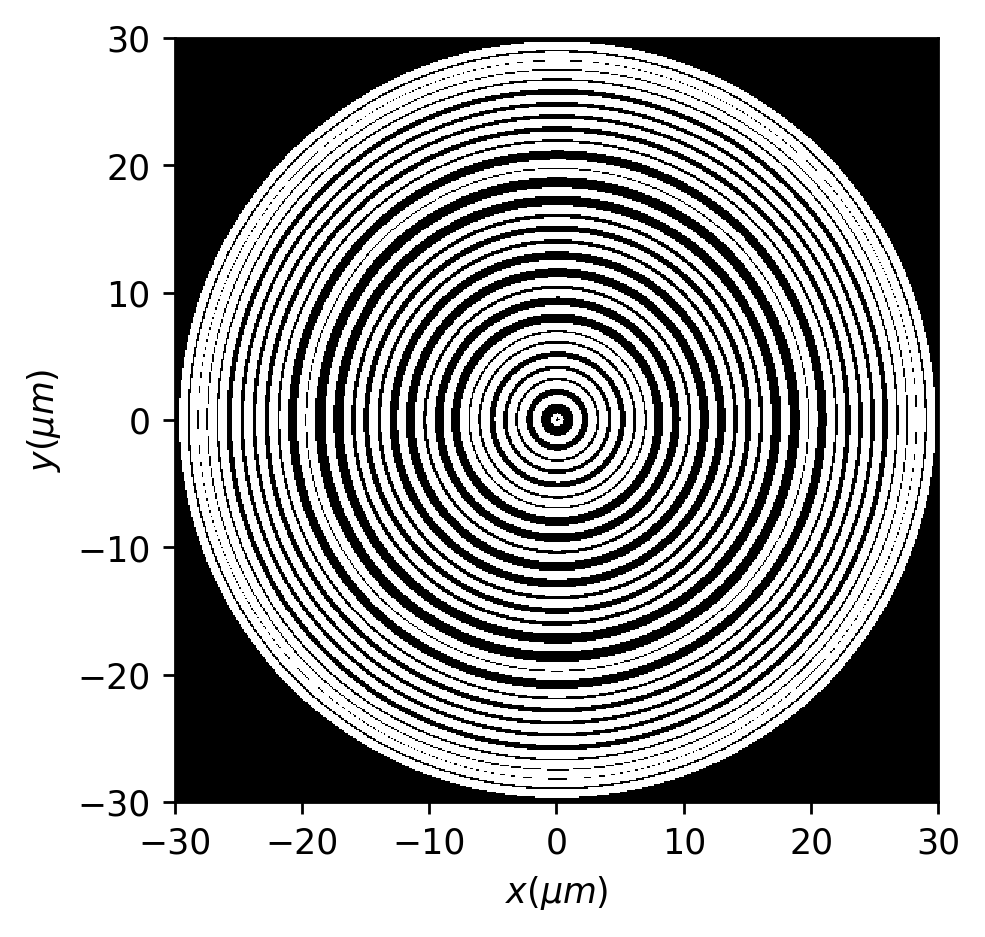

In [50]:
t0.draw()

In [51]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.radial_wave(u=t,r0=(0,0))

In [52]:
E1=E0.VRS(z=z_obs, n=1, new_field=True)
E1.cut_resample([-5,5],[-5,5],num_points=[512,512])

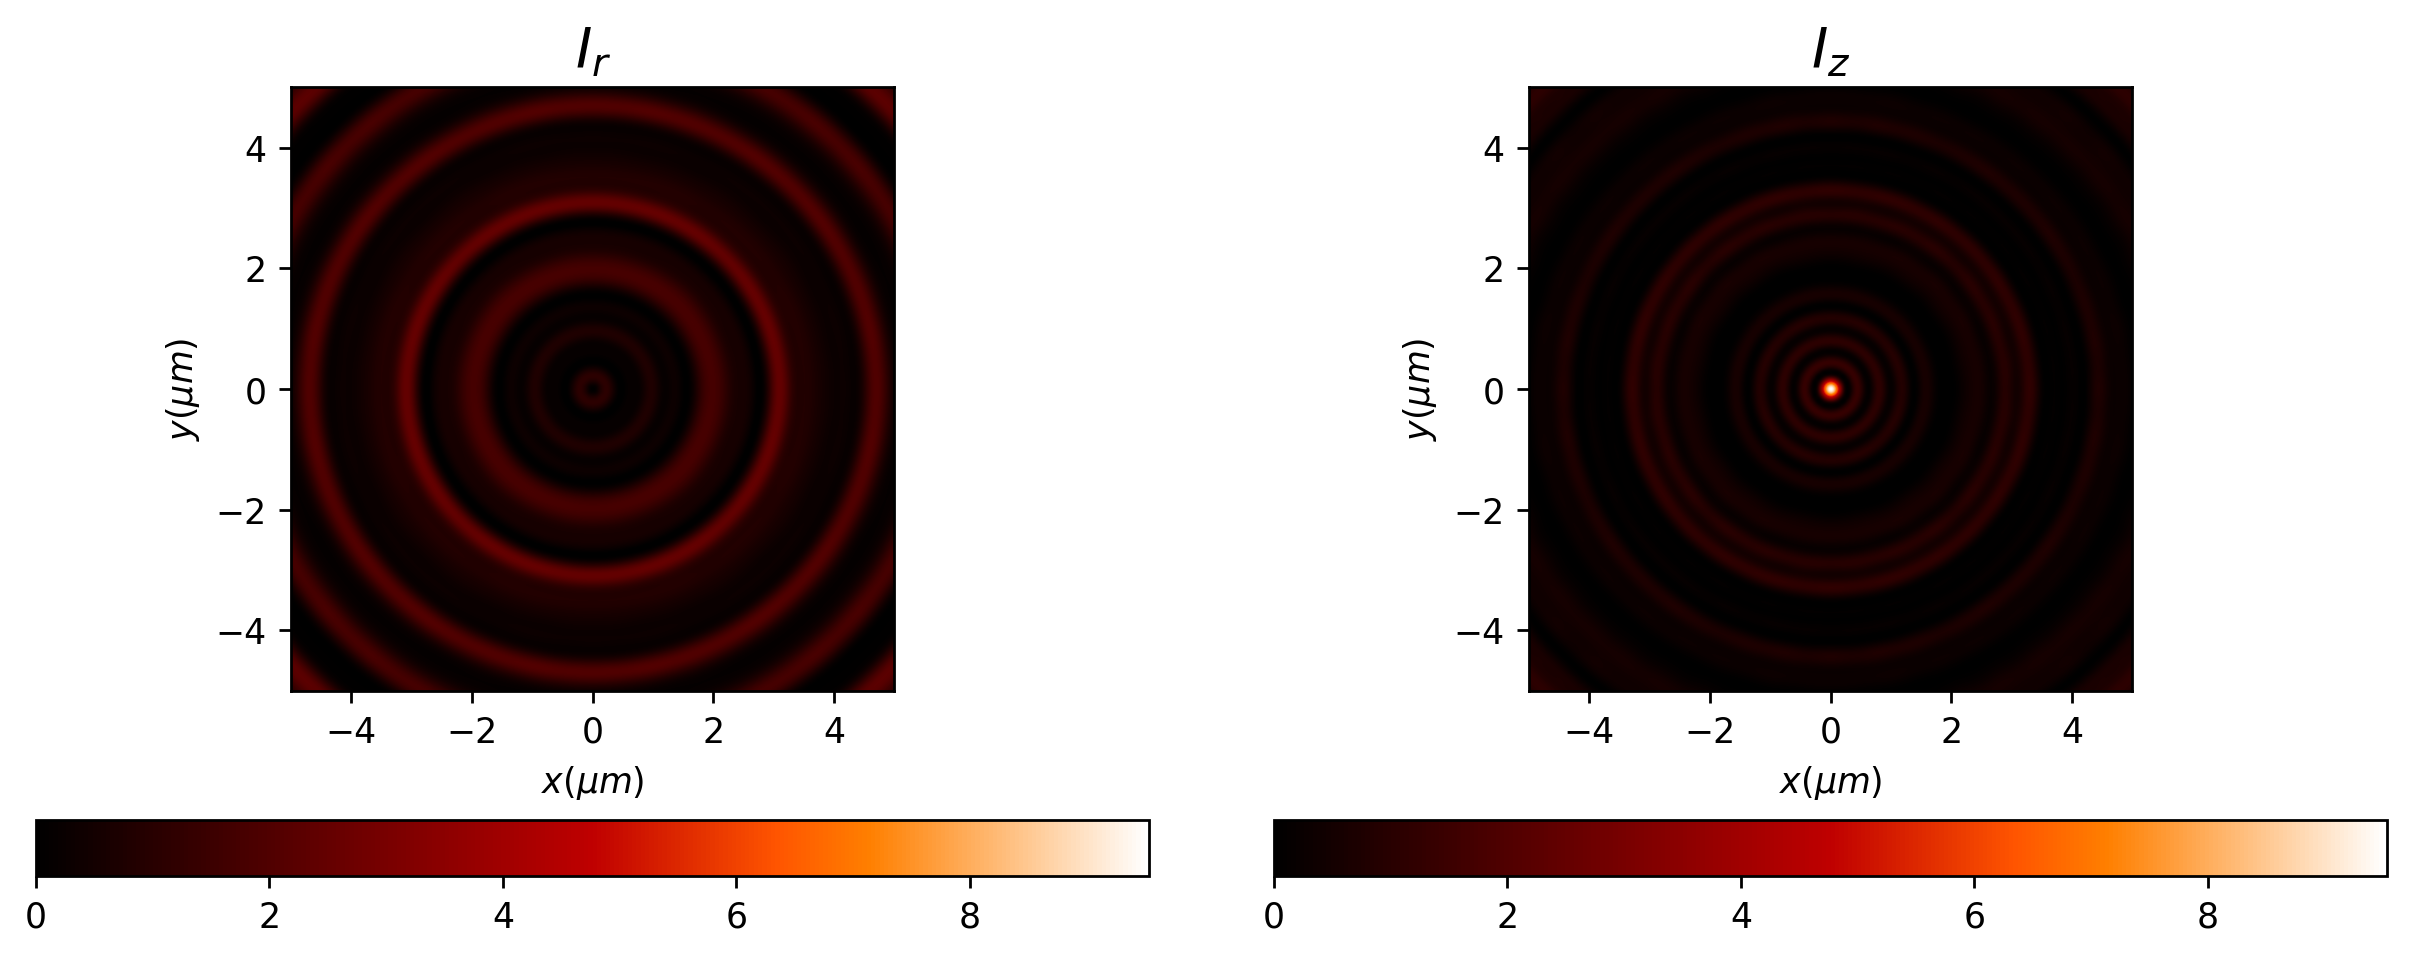

In [53]:
E1.draw('intensities_rz', logarithm=False);

In [54]:
Ex,Ey, Ez=E1.get('fields', is_matrix=False)

Iz=np.abs(Ez.u)**2
Ir=np.abs(Ex.u)**2+np.abs(Ey.u)**2

I_total=Iz+Ir

Ex.u=np.sqrt(Ir)
Ey.u=np.sqrt(Iz)

z,I_r,_,_=Ex.profile([-3,0],[3,0], order=2);
z,I_z,_,_=Ey.profile([-3,0],[3,0], order=2);

I_total=I_r+I_z

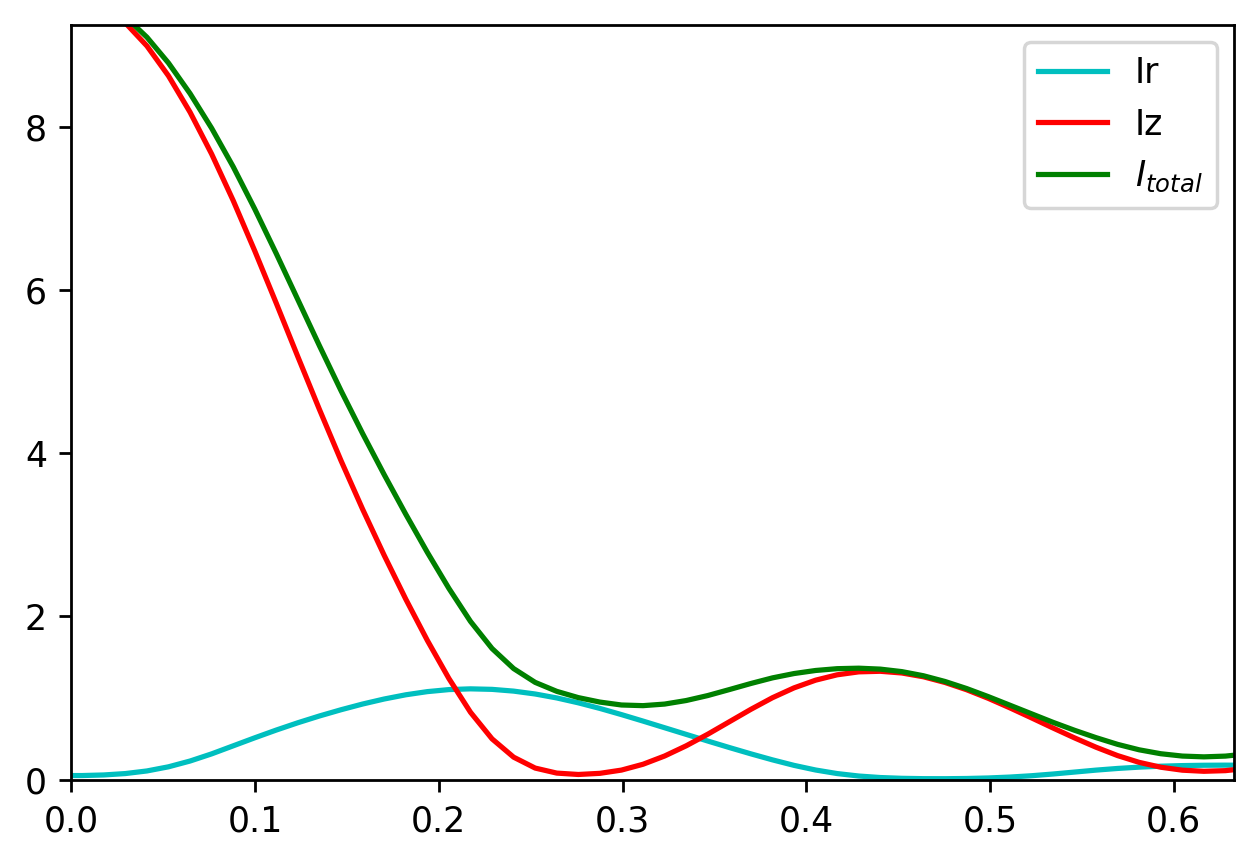

In [55]:
plt.figure()
plt.plot(z, I_r,'c',label='Ir')
plt.plot(z, I_z,'r', label='Iz')
plt.plot(z, I_total,'g', label='$I_{total}$')
plt.legend()

plt.xlim(0,wavelength)
plt.ylim(ymin=0, ymax=9.25);

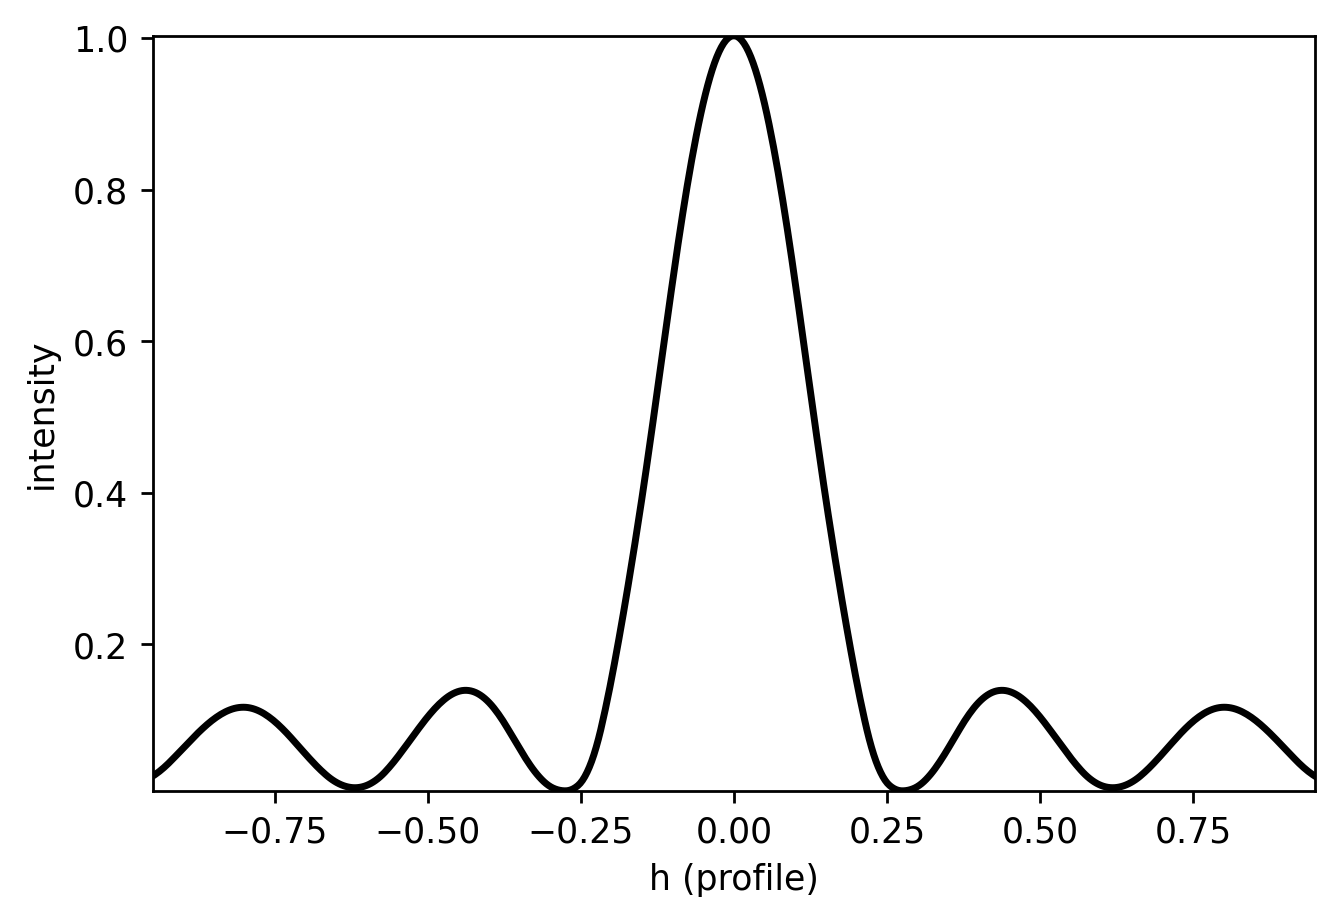

In [56]:
Ey.u=Ey.u/Ey.u.max()
Ey.draw_profile([-1.5*wavelength,0],[1.5*wavelength,0],order=2);

In [57]:
Ey.cut_resample([-wavelength,wavelength],[-wavelength,wavelength], num_points=[256,256])


width = 0.4219562175641547 lambda


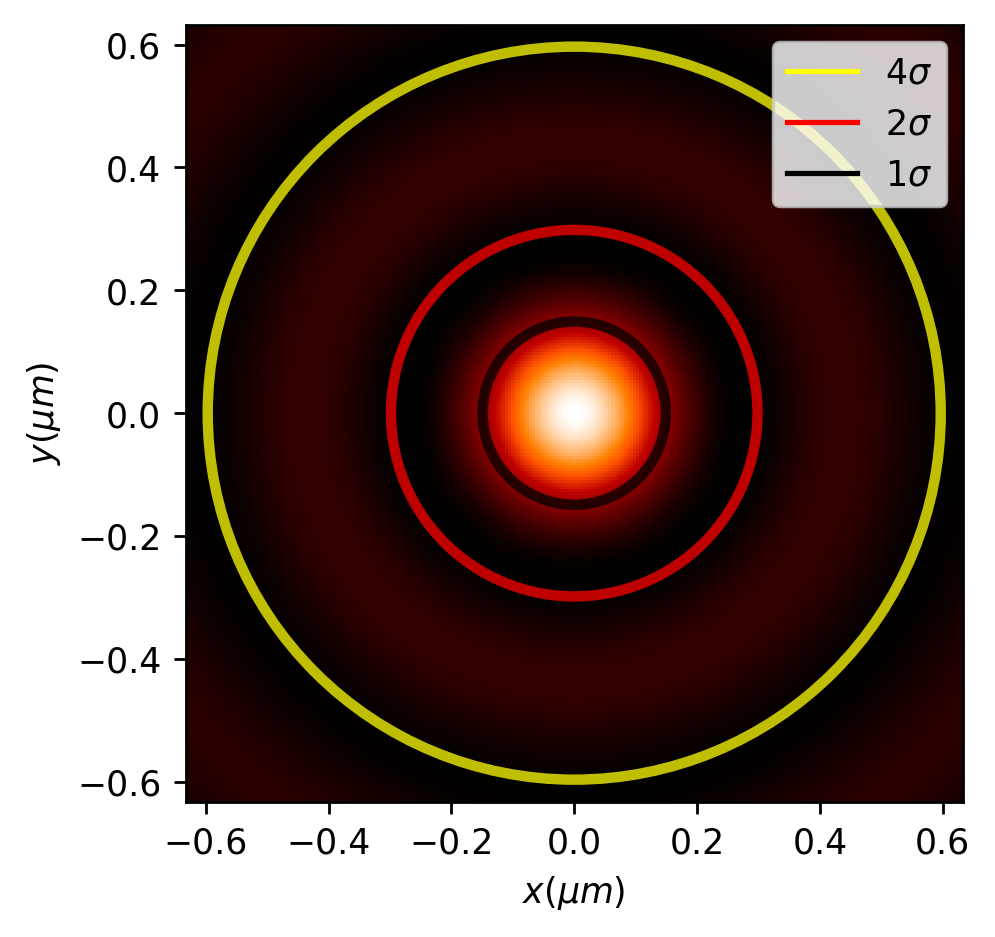

In [58]:
width,_,_,_=Ey.beam_width_4s()
print("width = {} lambda".format(width/(2*np.sqrt(2))))
